In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression as LR
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 

In [2]:
df0 = pd.read_csv('expense.csv', index_col=0)
df2 = pd.read_csv('transaction_description.csv')

In [3]:
expense_collect= dict.fromkeys(['Automobile - Gasoline', 'Automobile - Maintenance', 'Automobile - Payment', 
                                'Insurance - Auto'], 'Automobile')
expense_collect.update(dict.fromkeys(['Taxes - Federal', 'Taxes - State', 'Taxes - Other Taxes'], 'Income Tax'))
expense_collect.update(dict.fromkeys(['Taxes - Real Estate', 'Household - Laundry/Dry Cleaning', 'Rent', 'Mortgage',
                                      'Household - Maintenance/Repairs', 'Household - Other Household', 'Insurance - Home/Renter', 
                                      'Fees - Realtor/Appraiser'], 'Household'))
expense_collect.update(dict.fromkeys(['Personal Needs', 'Miscellaneous Expense'], 'Personal Misc'))
expense_collect.update(dict.fromkeys(['Utilities - Telephone/Internet/Cable', 'Utilities - Garbage', 
                                      'Utilities - Gas & Electric', 'Utilities - Water/Sewer', 
                                      'Subscriptions & Dues'], 'Utilities'))
expense_collect.update(dict.fromkeys(['Hobby', 'Entertainment', 'Pet Care'], 'Hobbey'))
expense_collect.update(dict.fromkeys(['Insurance - Medical', 'Medical - Ambulance/Transport', 
                                      'Medical - Dental', 'Medical - Doctor/Hospital', 'Medical: Equipment', 
                                      'Medical - Prescriptions'], 'Medical'))
expense_collect.update(dict.fromkeys(['Transportation', 'Travel'], 'Travel'))
expense_collect.update(dict.fromkeys(['Fees - Court', 'Fees - Attorney'], 'Court'))
expense_collect.update(dict.fromkeys(['Fees - Accountant', 'Bank Service Charges', 'Bond Premium', 
                                      'Debt - Interest', 'Fees - Late'], 'Banking'))
expense_collect.update(dict.fromkeys(['Services - Cleaning', 'Services - Personal Care'], 'Services'))
expense_collect.update(dict.fromkeys(['Food - Groceries', 'Food - Dining Out'], 'Food'))
expense_collect.update(dict.fromkeys(['Charitable Donation','Gifts Given'], 'Charity Gifts'))

expense_collect.update(dict.fromkeys([]))
expense_collect['Care Facility'] = 'Care Facility'
expense_collect['Fees - Guardian/Conservator'] = 'Fees - Guardian/Conservator'

expense_collect['Insurance - Other Insurance'] = 'Insurance - Other Insurance'
expense_collect['Clothing'] = 'Clothing'
expense_collect['Fees - Other Fees'] = 'Fees - Other Fees'
expense_collect['Asset Depreciation'] = 'Asset Depreciation'
expense_collect['Personal Property - Purchase'] = 'Personal Property - Purchase'
expense_collect['Support Payments'] = 'Support Payments'
expense_collect['Funeral'] = 'Funeral'
expense_collect['Education'] = 'Education'


In [4]:
df0['TranCatColl'] = df0['TranDescr'].map(expense_collect)
df0['MonthAmount'] = df0['Amount']*30/df0['NumDays']
df0['normalized'] = df0['MonthAmount'].div(df0.groupby('CasFil')['MonthAmount'].transform('sum'))

In [5]:
df_piv_count = df0.pivot_table(values=['MonthAmount'], index=['CasFil'], columns='TranCatColl', aggfunc='count')
df_piv_count.fillna(0, inplace=True)
df_piv_count

MonthAmount                                                 \
TranCatColl Asset Depreciation Automobile Banking Care Facility Charity Gifts   
CasFil                                                                          
4815                       0.0        0.0     0.0           1.0           0.0   
4816                       0.0        0.0     0.0           0.0           0.0   
4818                       0.0        0.0     0.0           0.0           0.0   
4820                       0.0        0.0     0.0           0.0           0.0   
4821                       0.0        0.0     0.0           0.0           0.0   
4826                       0.0        0.0     0.0           0.0           0.0   
4829                       0.0        0.0     0.0           0.0           0.0   
4832                       2.0        2.0     8.0          13.0           2.0   
4835                       0.0        0.0     0.0           0.0           0.0   
4841                       0.0        0.0     0.0           0.0           0.0   
4843                       0.0        3.0    13.0          45.0           6.0   
4844                       0.0        0.0    13.0          13.0           0.0   
4845                       0.0        0.0     0.0           2.0           0.0   
4846                       0.0        0.0     3.0           5.0           0.0   
4848                       0.0        0.0     0.0          12.0           0.0   
4851                       0.0        0.0     0.0           0.0           0.0   
4852                       0.0        0.0     1.0           0.0           0.0   
4853                       0.0        8.0     3.0          12.0          10.0   
4854                       0.0        0.0     2.0           0.0           0.0   
4855                       0.0        0.0     0.0          11.0           0.0   
4859                       0.0        0.0     1.0           0.0           0.0   
4860                       0.0        0.0     1.0          13.0           0.0   
4862                       0.0        0.0     1.0          14.0           1.0   
4864                       2.0        0.0     0.0           0.0           0.0   
4865                       0.0        1.0     0.0           0.0           0.0   
4866                       0.0        0.0     0.0           0.0           0.0   
4867                       0.0        0.0     1.0           0.0           0.0   
4868                       0.0        0.0     3.0           0.0           0.0   
4869                       6.0        0.0    11.0           0.0           0.0   
4871                       2.0        0.0     3.0          12.0           0.0   
...                        ...        ...     ...           ...           ...   
34317                      0.0        0.0     0.0           0.0           0.0   
34323                      0.0        0.0     0.0           0.0           0.0   
34334                      0.0        0.0     1.0           0.0           0.0   
34338                      0.0        0.0     1.0           0.0           0.0   
34367                      0.0        0.0     0.0           0.0           2.0   
34371                      0.0        9.0     0.0           0.0          19.0   
34373                      0.0        0.0     0.0           0.0           0.0   
34374                      0.0        0.0     4.0           0.0           0.0   
34375                      0.0        0.0     4.0           0.0           0.0   
34377                      0.0        0.0     0.0           0.0           0.0   
34406                      0.0        0.0     0.0           0.0           0.0   
34421                      0.0        0.0     1.0           0.0           0.0   
34422                      0.0        0.0     3.0           0.0           0.0   
34423                      0.0        0.0     0.0           0.0           0.0   
34430                      0.0        0.0     2.0           0.0           0.0   
34432                      0.0        0.0     0.0 

In [6]:
df_piv_sum = df0.pivot_table(values=['MonthAmount'], index=['CasFil'], columns='TranCatColl', aggfunc='sum')
df_piv_sum.fillna(0, inplace=True)
df_piv_sum

MonthAmount                                       \
TranCatColl Asset Depreciation Automobile     Banking Care Facility   
CasFil                                                                
4815                  0.000000   0.000000    0.000000     24.007682   
4816                  0.000000   0.000000    0.000000      0.000000   
4818                  0.000000   0.000000    0.000000      0.000000   
4820                  0.000000   0.000000    0.000000      0.000000   
4821                  0.000000   0.000000    0.000000      0.000000   
4826                  0.000000   0.000000    0.000000      0.000000   
4829                  0.000000   0.000000    0.000000      0.000000   
4832                  3.798892   7.178372   90.950928   1422.450505   
4835                  0.000000   0.000000    0.000000      0.000000   
4841                  0.000000   0.000000    0.000000      0.000000   
4843                  0.000000   3.625954  141.262625    454.587898   
4844                  0.000000   0.000000    3.240542    350.930325   
4845                  0.000000   0.000000    0.000000     14.228975   
4846                  0.000000   0.000000    5.253563    899.129404   
4848                  0.000000   0.000000    0.000000    484.807932   
4851                  0.000000   0.000000    0.000000      0.000000   
4852                  0.000000   0.000000    0.802139      0.000000   
4853                  0.000000  64.010879   19.688806   1515.587464   
4854                  0.000000   0.000000    2.123377      0.000000   
4855                  0.000000   0.000000    0.000000    366.574534   
4859                  0.000000   0.000000    0.395170      0.000000   
4860                  0.000000   0.000000   23.013375   1833.401968   
4862                  0.000000   0.000000    0.563781    247.880996   
4864                223.414929   0.000000    0.000000      0.000000   
4865                  0.000000   1.196013    0.000000      0.000000   
4866                  0.000000   0.000000    0.000000      0.000000   
4867                  0.000000   0.000000    4.157825      0.000000   
4868                  0.000000   0.000000    7.665794      0.000000   
4869                228.868075   0.000000   99.874068      0.000000   
4871                 61.651610   0.000000   18.558695   1201.113649   
...                        ...        ...         ...           ...   
34317                 0.000000   0.000000    0.000000      0.000000   
34323                 0.000000   0.000000    0.000000      0.000000   
34334                 0.000000   0.000000   14.276674      0.000000   
34338                 0.000000   0.000000    0.061633      0.000000   
34367                 0.000000   0.000000    0.000000      0.000000   
34371                 0.000000   7.071386    0.000000      0.000000   
34373                 0.000000   0.000000    0.000000      0.000000   
34374                 0.000000   0.000000    4.169886      0.000000   
34375                 0.000000   0.000000    4.169886      0.000000   
34377                 0.000000   0.000000    0.000000      0.000000   
34406                 0.000000   0.000000    0.000000      0.000000   
34421                 0.000000   0.000000    0.168729      0.000000   
34422                 0.000000   0.000000   23.374304      0.000000   
34423                 0.000000   0.000000    0.000000      0.000000   
34430                 0.000000   0.000000    3.441597      0.000000   
34432                 0.000000   0.000000    0.000000    108.625666   
34444                 0.000000   0.000000    0.595578     93.845285   
34445                 0.000000   0.000000    0.000000      0.000000   
34452                 0.000000   0.000000    0.000000      0.000000   
34455                 0.000000   1.943759    0.000000    354.774142   
34462                 0.000000  26.228179    1.035582      0.000000   
34463                 0.000000   0.000000    0.000000      0.000000   
34464                 0.944710   8.179345  

In [7]:
df_piv_avg = df0.pivot_table(values=['MonthAmount'], index=['CasFil'], columns='TranCatColl', aggfunc='mean')
df_piv_avg.fillna(0, inplace=True)
df_piv_avg

MonthAmount                                      \
TranCatColl Asset Depreciation Automobile    Banking Care Facility   
CasFil                                                               
4815                  0.000000   0.000000   0.000000     24.007682   
4816                  0.000000   0.000000   0.000000      0.000000   
4818                  0.000000   0.000000   0.000000      0.000000   
4820                  0.000000   0.000000   0.000000      0.000000   
4821                  0.000000   0.000000   0.000000      0.000000   
4826                  0.000000   0.000000   0.000000      0.000000   
4829                  0.000000   0.000000   0.000000      0.000000   
4832                  1.899446   3.589186  11.368866    109.419270   
4835                  0.000000   0.000000   0.000000      0.000000   
4841                  0.000000   0.000000   0.000000      0.000000   
4843                  0.000000   1.208651  10.866356     10.101953   
4844                  0.000000   0.000000   0.249272     26.994640   
4845                  0.000000   0.000000   0.000000      7.114488   
4846                  0.000000   0.000000   1.751188    179.825881   
4848                  0.000000   0.000000   0.000000     40.400661   
4851                  0.000000   0.000000   0.000000      0.000000   
4852                  0.000000   0.000000   0.802139      0.000000   
4853                  0.000000   8.001360   6.562935    126.298955   
4854                  0.000000   0.000000   1.061688      0.000000   
4855                  0.000000   0.000000   0.000000     33.324958   
4859                  0.000000   0.000000   0.395170      0.000000   
4860                  0.000000   0.000000  23.013375    141.030921   
4862                  0.000000   0.000000   0.563781     17.705785   
4864                111.707464   0.000000   0.000000      0.000000   
4865                  0.000000   1.196013   0.000000      0.000000   
4866                  0.000000   0.000000   0.000000      0.000000   
4867                  0.000000   0.000000   4.157825      0.000000   
4868                  0.000000   0.000000   2.555265      0.000000   
4869                 38.144679   0.000000   9.079461      0.000000   
4871                 30.825805   0.000000   6.186232    100.092804   
...                        ...        ...        ...           ...   
34317                 0.000000   0.000000   0.000000      0.000000   
34323                 0.000000   0.000000   0.000000      0.000000   
34334                 0.000000   0.000000  14.276674      0.000000   
34338                 0.000000   0.000000   0.061633      0.000000   
34367                 0.000000   0.000000   0.000000      0.000000   
34371                 0.000000   0.785710   0.000000      0.000000   
34373                 0.000000   0.000000   0.000000      0.000000   
34374                 0.000000   0.000000   1.042471      0.000000   
34375                 0.000000   0.000000   1.042471      0.000000   
34377                 0.000000   0.000000   0.000000      0.000000   
34406                 0.000000   0.000000   0.000000      0.000000   
34421                 0.000000   0.000000   0.168729      0.000000   
34422                 0.000000   0.000000   7.791435      0.000000   
34423                 0.000000   0.000000   0.000000      0.000000   
34430                 0.000000   0.000000   1.720798      0.000000   
34432                 0.000000   0.000000   0.000000     54.312833   
34444                 0.000000   0.000000   0.595578     93.845285   
34445                 0.000000   0.000000   0.000000      0.000000   
34452                 0.000000   0.000000   0.000000      0.000000   
34455                 0.000000   1.943759   0.000000     32.252195   
34462                 0.000000   5.245636   1.035582      0.000000   
34463                 0.000000   0.000000   0.000000      0.000000   
34464                 0.944710   2.726448   1.910197    112.142022   
34474                 0.00000

In [11]:
s = df0['CasFil'].value_counts()
idx = s[s>100].index

{'boxes': [<matplotlib.lines.Line2D at 0x7f982ecff390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f982ecfffd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f982ed0df50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f982ed67a10>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9844f69150>,
  <matplotlib.lines.Line2D at 0x7f982ea51690>]}

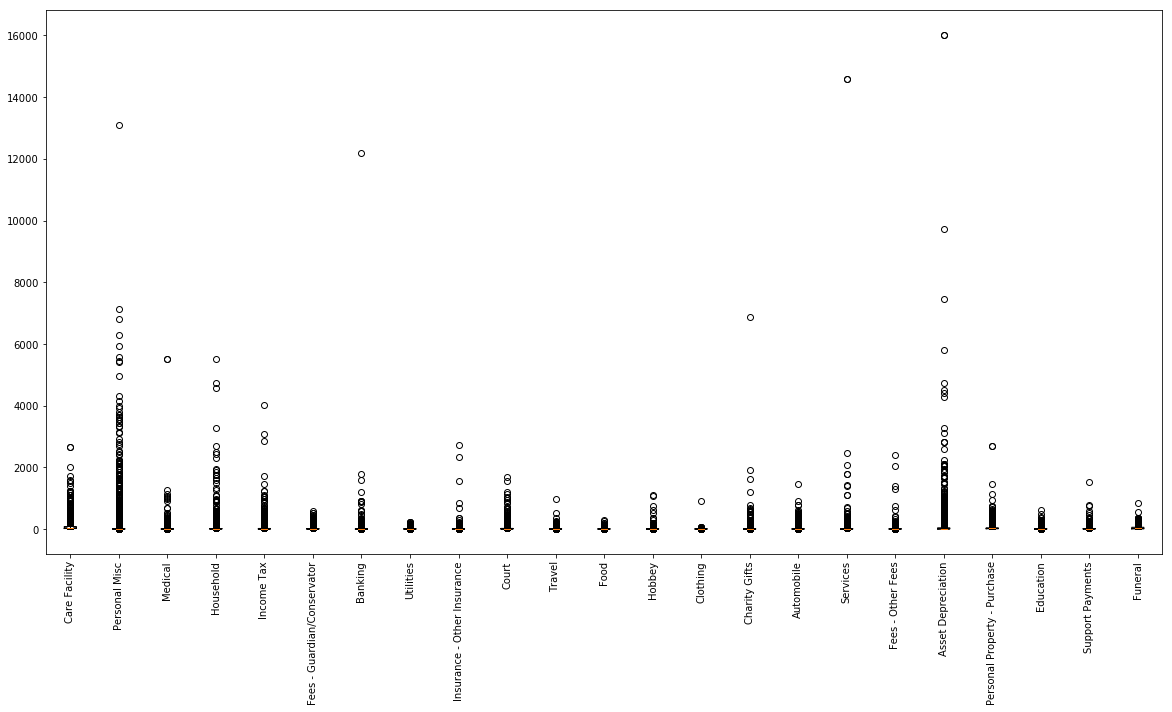

In [16]:
coll_cat = df0['TranCatColl'].unique()



df0.groupby('CasFil')['MonthAmount'].count

#A = [df0[(df0['CasFil'].isin(idx)) & (df0['TranCatColl']== cat)]['MonthAmount'].values for cat in coll_cat]

A = [df0[df0['TranCatColl']== cat]['MonthAmount'].values for cat in coll_cat]
plt.figure(figsize = (20,10))
plt.xticks(rotation=90)
plt.boxplot(A, notch=True, widths=0.25, labels = coll_cat)

{'boxes': [<matplotlib.lines.Line2D at 0x7f98401dbfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f98401e4c50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f98401efa50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f98401db110>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9848cc3110>,
  <matplotlib.lines.Line2D at 0x7f982eedf590>]}

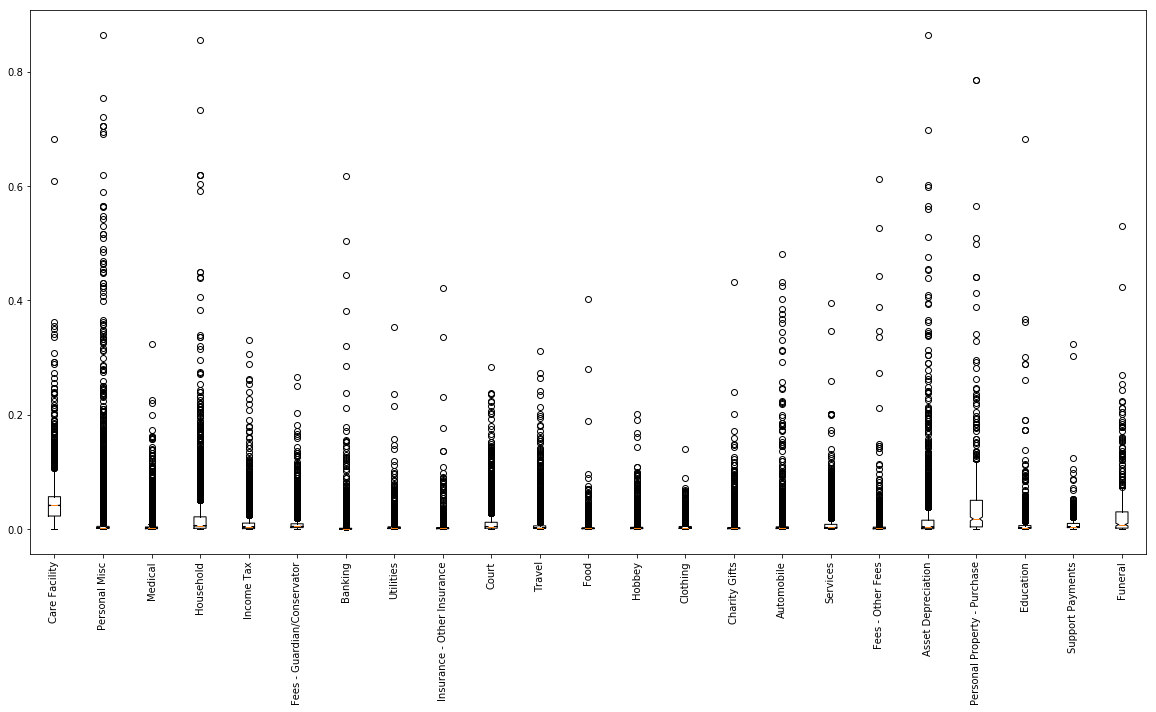

In [15]:
coll_cat = df0['TranCatColl'].unique()

A = [df0[(df0['CasFil'].isin(idx)) & (df0['TranCatColl']== cat)]['normalized'].values for cat in coll_cat]

# A = [df0[df0['TranCatColl']== cat]['normalized'].values for cat in coll_cat]
plt.figure(figsize = (20,10))
plt.xticks(rotation=90)
plt.boxplot(A, notch=True, widths=0.25, labels = coll_cat)

In [11]:
df0[df0['TranCatColl']=='Personal Misc']['Amount'].mean()

288.34481951357833

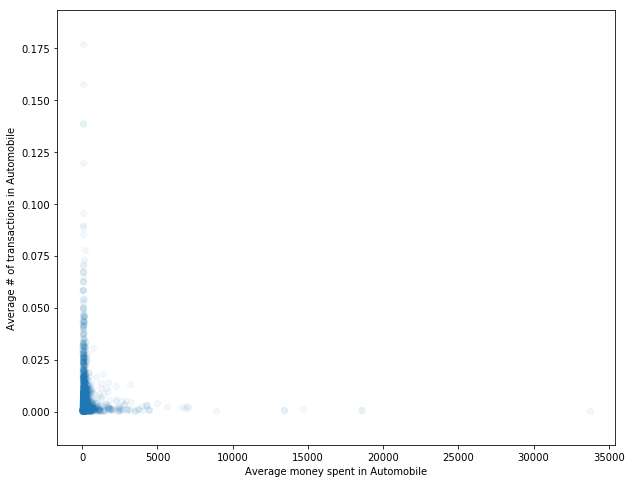

In [26]:
cat = 'Automobile'

def plt_norm_tran(cat):
    average = df0[df0['TranCatColl']==cat].groupby('CasFil')['Amount'].mean()
    count = df0[df0['TranCatColl']==cat].groupby('CasFil')['Amount'].count()
    dura = df0[df0['TranCatColl']==cat].groupby('CasFil')['NumDays'].mean()

    plt.figure(figsize=(10,8))
    plt.scatter(average, count/dura, alpha=0.05)
    plt.xlabel('Average money spent in ' + cat)
    plt.ylabel('Average # of transactions in ' + cat)
    
plt_norm_tran(cat = 'Automobile')

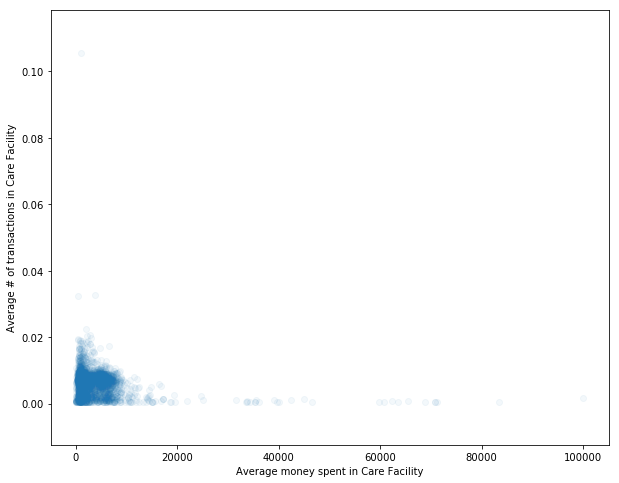

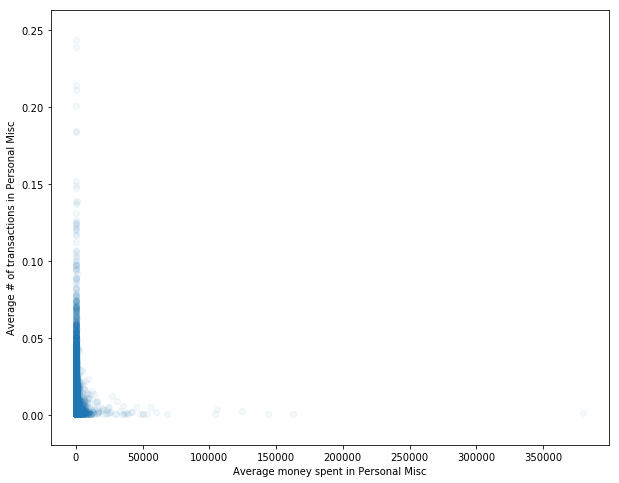

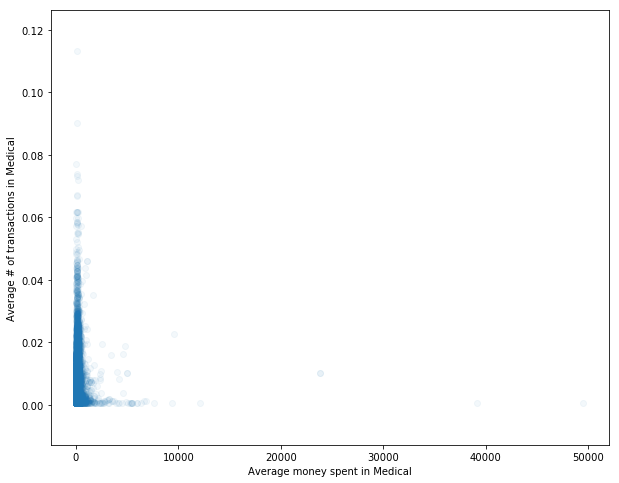

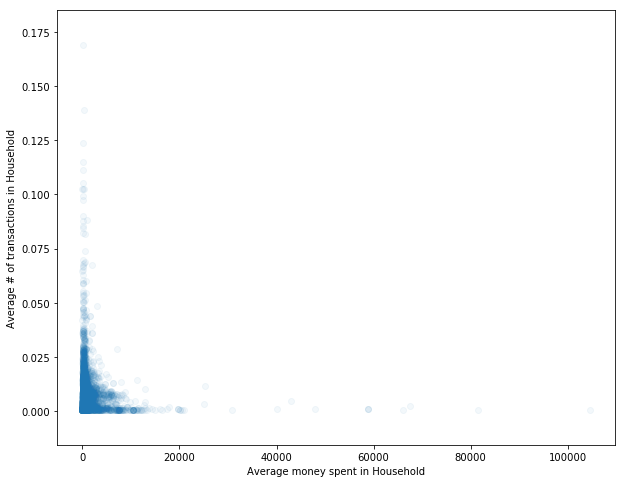

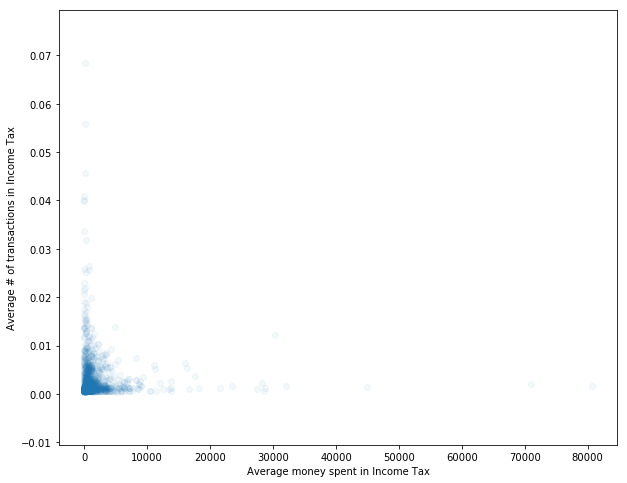

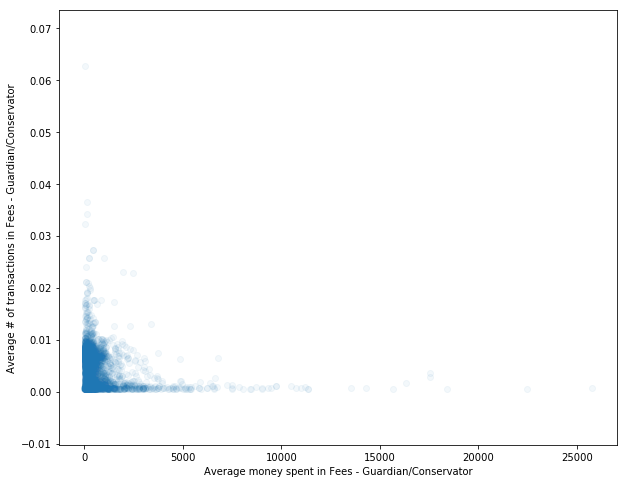

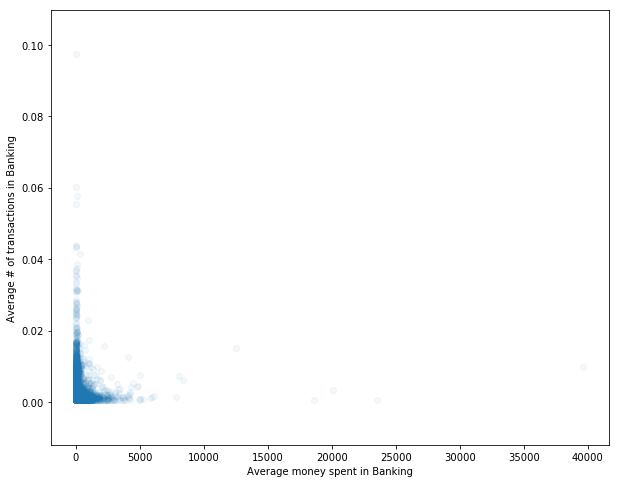

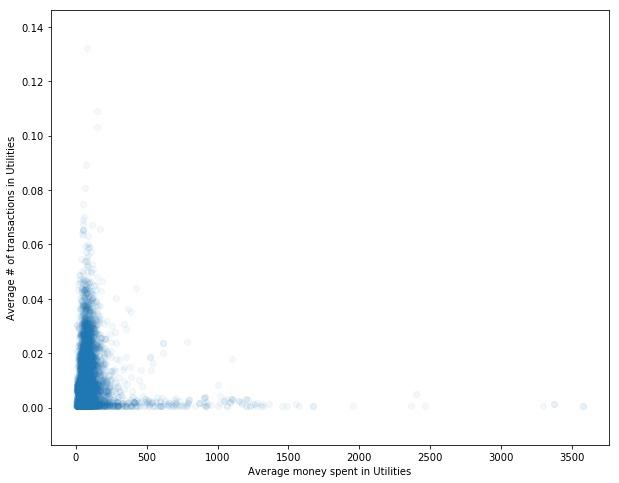

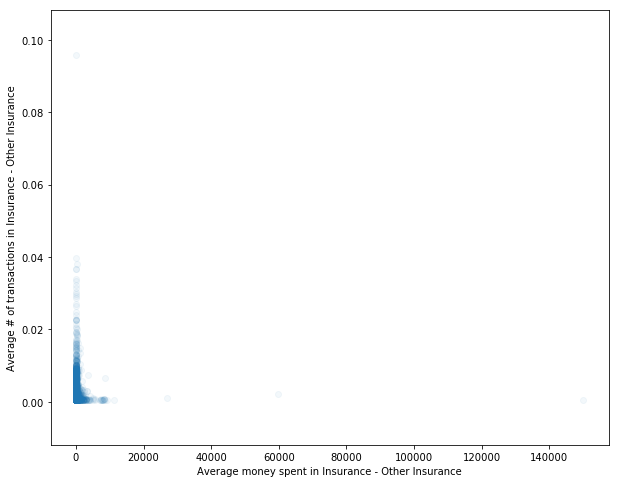

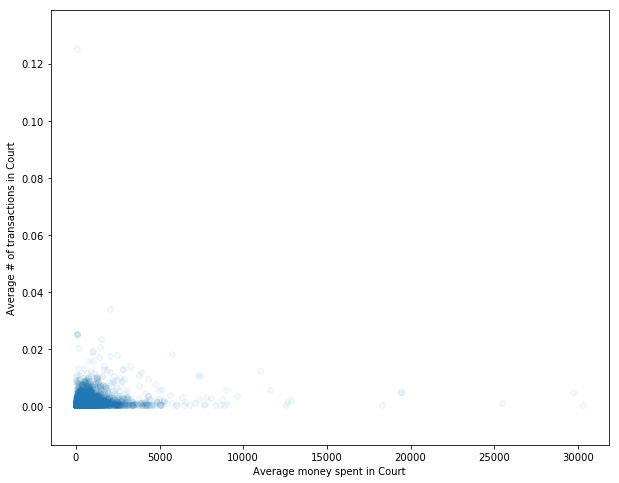

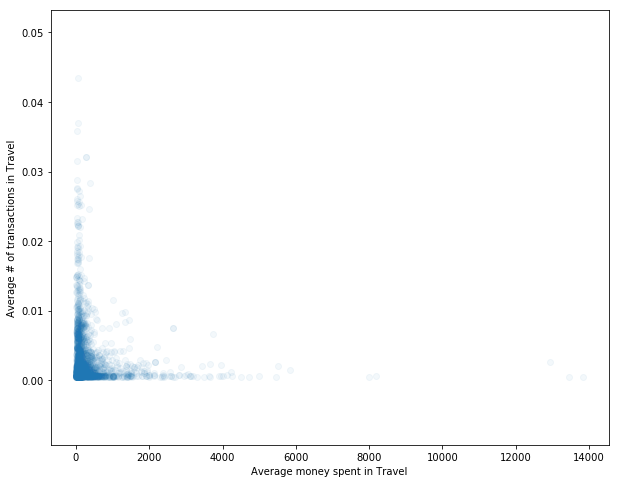

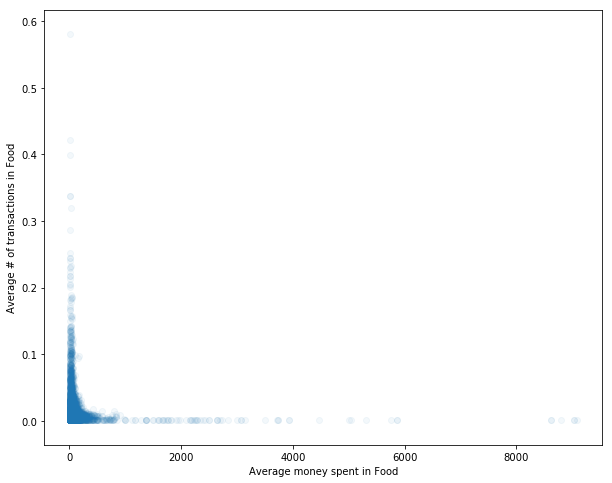

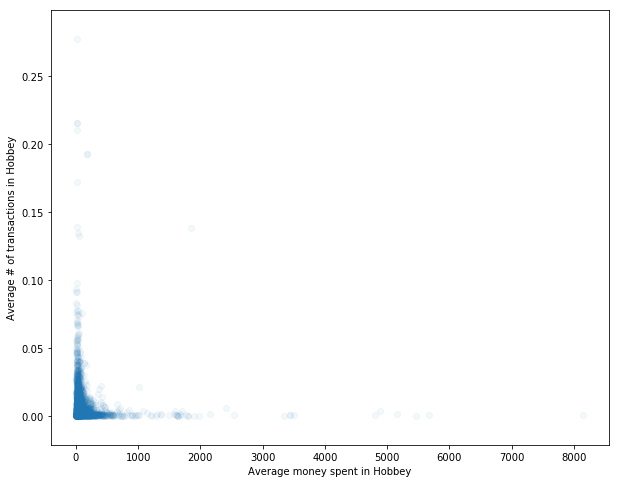

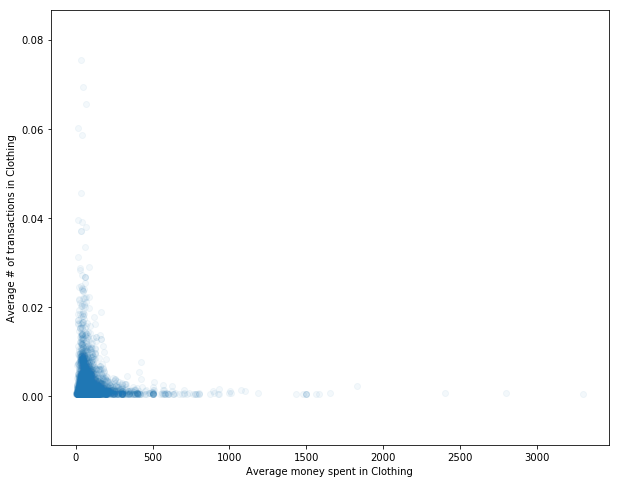

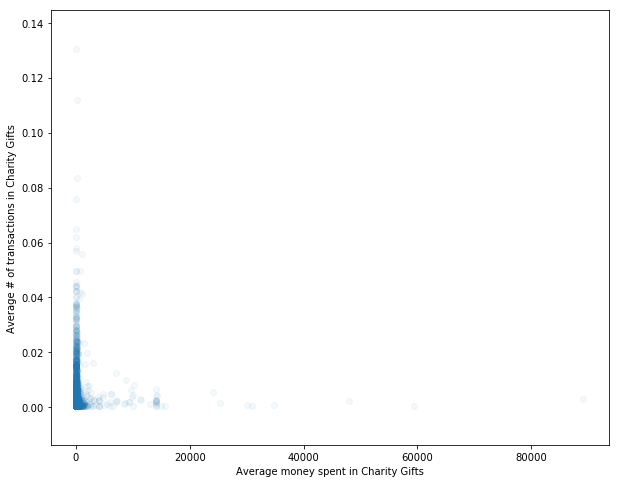

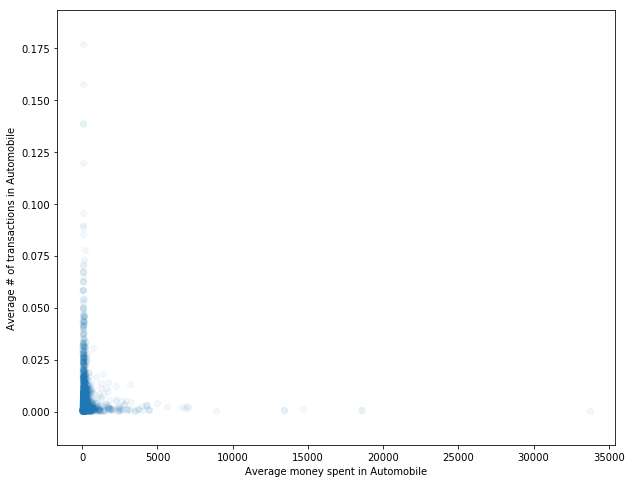

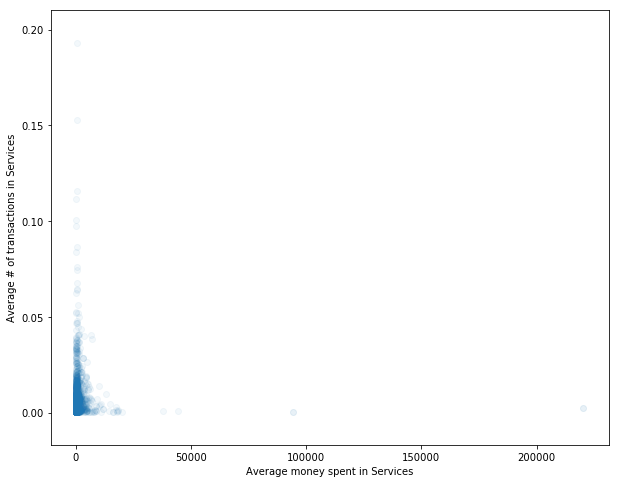

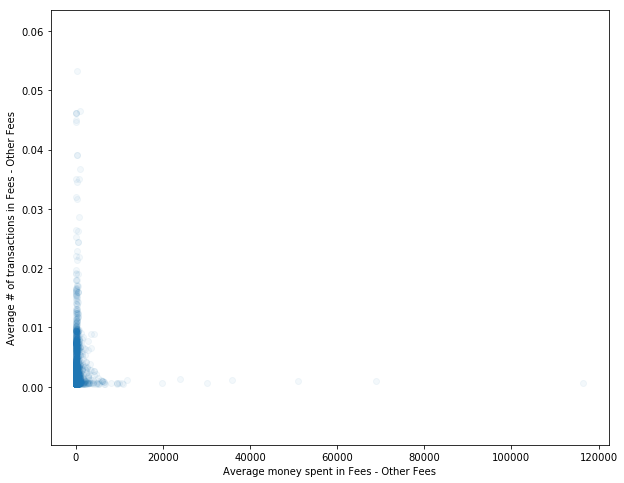

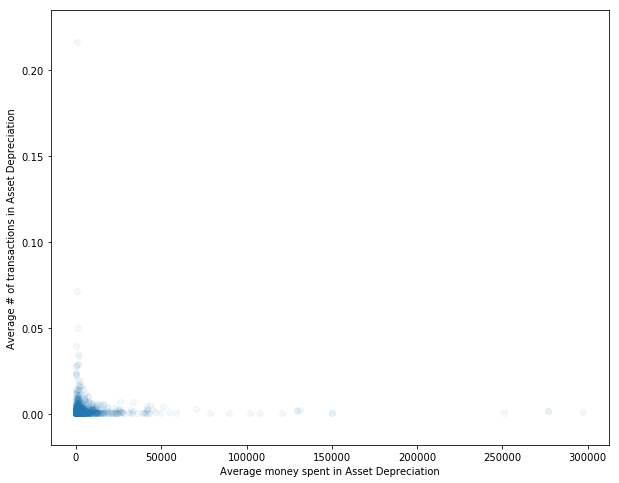

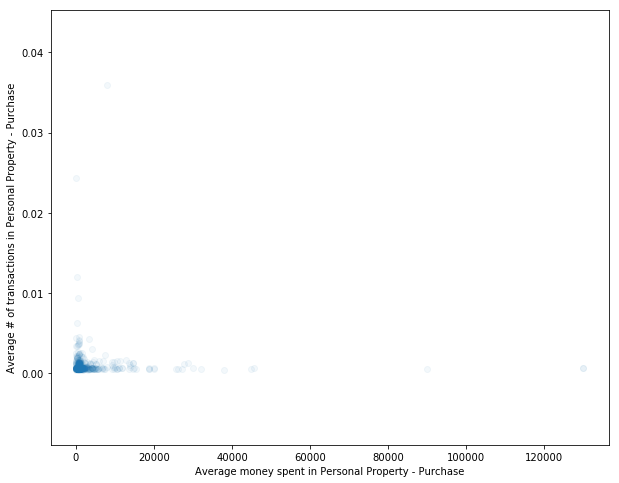

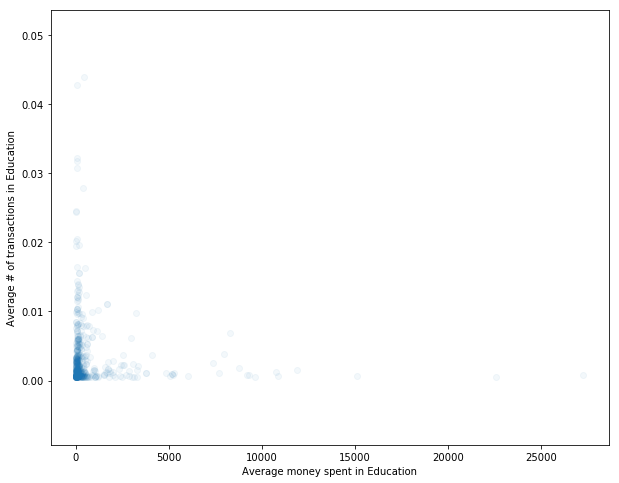

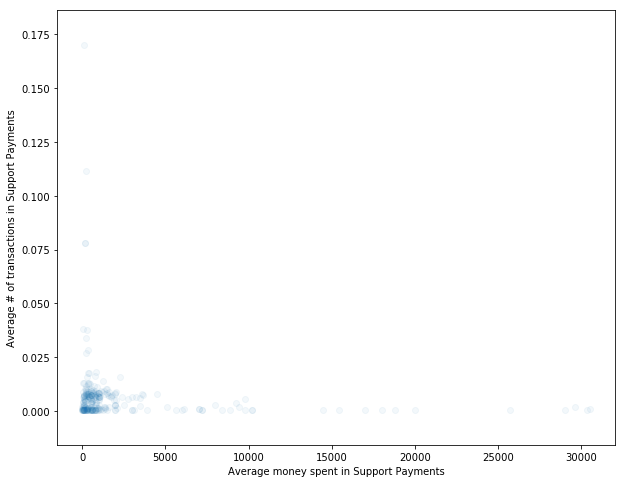

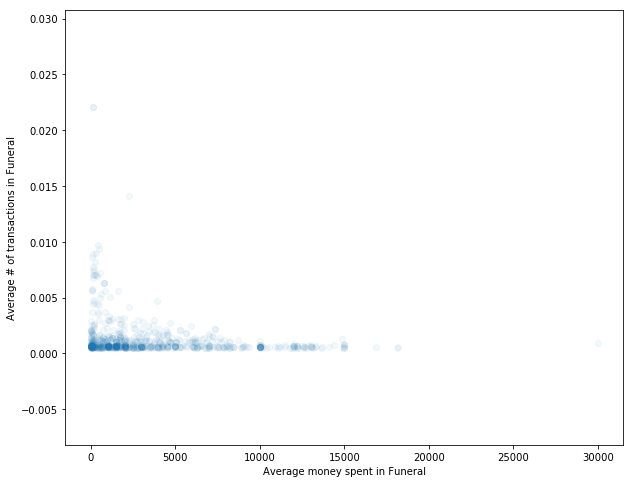

In [27]:
coll_cat = df0['TranCatColl'].unique()
for cat in coll_cat:
    plt_norm_tran(cat)

In [28]:
df0

,IncExpId,CasFil,Expense,Amount,TranDt,TranCat,TranDescr,CourtOrdTran,CarFac,NumDays,TranCatColl,MonthAmount,normalized
0,4673,4815,1,1250.00,2014-04-15,185,Care Facility,0,1,1562.0,Care Facility,24.007682,0.732708
1,4674,4815,1,104.00,2014-04-15,214,Personal Needs,0,0,1562.0,Personal Misc,1.997439,0.060961
2,4675,4815,1,352.00,2014-04-15,240,Medical - Prescriptions,0,0,1562.0,Medical,6.760563,0.206331
3,4676,4816,1,500.00,2014-04-15,214,Personal Needs,0,0,1562.0,Personal Misc,9.603073,1.000000
4,4677,4820,1,456.00,2014-04-15,239,Rent,0,0,1562.0,Household,8.758003,1.000000
5,4678,4818,1,560.00,2014-04-16,239,Rent,0,0,1563.0,Household,10.748560,1.000000
6,4679,4821,1,120.00,2014-04-16,239,Rent,0,0,1563.0,Household,2.303263,1.000000
7,4680,4826,1,560.00,2014-04-16,239,Rent,0,0,1563.0,Household,10.748560,1.000000
10,4683,4829,1,1200.00,2014-04-16,224,Taxes - Federal,0,0,1563.0,Income Tax,23.032630,1.000000
11,4684,4835,1,456.00,2014-04-16,239,Rent,0,0,1563.0,Household,8.752399,1.000000


In [40]:
tax_people =  df0[(df0['TranDescr']=='Taxes - Other Taxes') | (df0['TranDescr']=='Taxes - Federal') | (df0['TranDescr']=='Taxes - State')]['CasFil'].unique()
len(tax_people)

1762

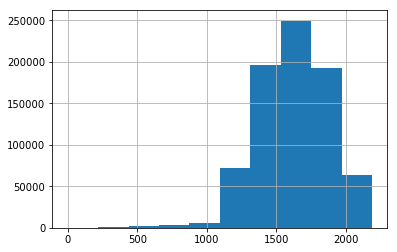

In [41]:
df0['NumDays'].hist()

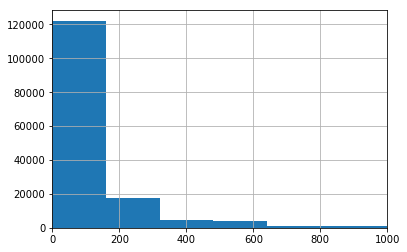

In [73]:
plt.xlim(0, 1000)
df0[df0['TranCatColl']=='Personal Misc']['Amount'].hist(bins=5000)

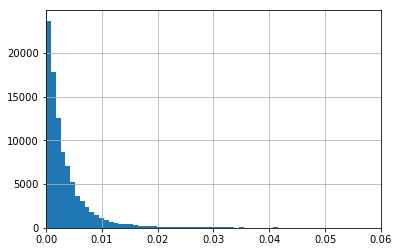

In [68]:
coll_cat = df0['TranCatColl'].unique()

# A = [df0[(df0['CasFil'].isin(idx)) & (df0['TranCat']== cat)]['normalized'].values for cat in coll_cat]
# plt.figure(figsize = (20,10))
plt.xlim(0, 0.06)
df0[(df0['CasFil'].isin(idx)) & (df0['TranCatColl']=='Personal Misc')]['normalized'].hist(bins=1000)

# A = [df0[df0['TranCatColl']== cat]['normalized'].values for cat in coll_cat]
# plt.boxplot(A, notch=True, widths=0.25, labels = coll_cat)

In [70]:
norm_exp_pers_misc = df0[df0['TranCatColl']=='Personal Misc']['normalized']

In [87]:
exp_pers_misc = df0[df0['TranCatColl']=='Personal Misc']['Amount']

In [90]:
np.percentile(exp_pers_misc.values, [10.0, 99.0])

array([   10.    ,  2554.5954])

In [91]:
np.percentile(norm_exp_pers_misc.values, [10.0, 99.0])

array([ nan,  nan])

In [92]:
norm_exp_pers_misc.values

array([ 0.06096131,  1.        ,  0.00266141, ...,  0.00249442,
        0.00998071,  0.0097877 ])